In [2]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import math
from mpl_toolkits import mplot3d
import scipy, scipy.optimize
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red

## Load Data

In [4]:
# Load Data(Edge)
file_location = r'C:\Users\sbadih\OneDrive - Gilead Sciences\Trodelvy 2.0 Modelling Data\Outputs\Design Space\data_log(Edge)_F4.xlsx'
assert os.path.isfile(file_location)
df = pd.read_excel(file_location,sheet_name='data_log(Edge)_F4')
print("Headers:")
print(list(df.columns))

Headers:
['Unnamed: 0', 'Shelf Temperature(C)', 'Chamber Pressure(mTorr)', 'Drying Time(Hrs)', 'Product Temperature(C)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']


In [5]:
#Define Variables(df)-Edge
temp=(df[['Shelf Temperature(C)']]).values #Shelf Temp.
press=(df[['Chamber Pressure(mTorr)']]).values #Chamber Press.
dt= (df[['Drying Time(Hrs)']]).values#Predicted Drying Time
tp= (df[['Product Temperature(C)']]).values#Predicted Product Temp.

## Surface Fitting

### Edge Cases

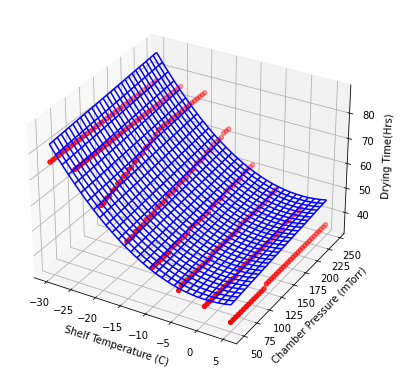

Parameters for Predicting Drying Time : [3.96116802e+01 2.22373358e-02 4.67463054e-02]
Covariance:
 [[ 1.17878267e+00 -6.21384251e-03 -4.24009877e-04]
 [-6.21384251e-03  4.21277452e-05  2.19193564e-14]
 [-4.24009877e-04  2.19193549e-14  1.47481696e-06]]


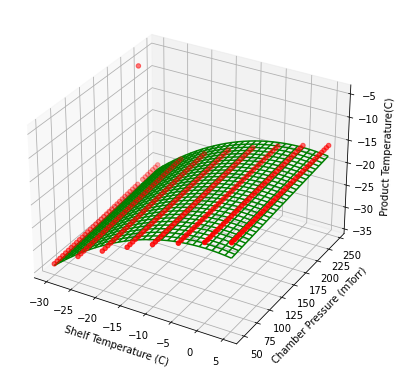

Parameters for Predicting Product Temperature : [-2.03906145e+01  1.15111672e-02 -1.57399138e-02]
Covariance:
 [[ 1.09664892e-01 -5.78088214e-04 -3.94466256e-05]
 [-5.78088214e-04  3.91924210e-06  7.72988000e-15]
 [-3.94466256e-05  7.72987996e-15  1.37205650e-07]]


In [12]:
#Plot(Edge)
data=[dt,tp]
title=["Drying Time","Product Temperature"]
label=["Drying Time(Hrs)",'Product Temperature(C)']
c=["b","g"]
for i in range(2):    
    # test function
    def function(data,a, b, c):
        x = data[0]
        y = data[1]
        return (y*b) + (x*x*c)+a
        #return b*x+c*y+a #Linear Plane
    #Data
    x_data=temp.reshape(-1).tolist()
    y_data=press.reshape(-1).tolist()
    z_data=data[i].reshape(-1).tolist()

    # get fit parameters from scipy curve fit
    parameters, covariance = curve_fit(function, [x_data, y_data], z_data, maxfev=100000)

    # create surface function model
    # setup data points for calculating surface model
    model_x_data = np.linspace(min(x_data), max(x_data), 30)
    model_y_data = np.linspace(min(y_data), max(y_data), 30)
    # create coordinate arrays for vectorized evaluations
    X, Y = np.meshgrid(model_x_data, model_y_data)
    # calculate Z coordinate array
    Z = function(np.array([X, Y]), *parameters)

    # setup figure object
    fig = plt.figure(figsize=(5,8))
    # setup 3d object
    ax = Axes3D(fig)
    # plot surface
    #ax.plot_surface(X, Y, Z,cmap="Greens")
    ax.plot_wireframe(X, Y, Z,color=c[i])

    # plot input data
    ax.scatter(x_data, y_data, z_data, color="red")
    # set plot descriptions
    ax.set_ylabel('Chamber Pressure (mTorr)')
    ax.set_xlabel('Shelf Temperature (C)')
    ax.set_zlabel(label[i])
    # rotate the axes and update
    for angle in range(0,0):
        ax.view_init(30, angle)
    plt.show()
    print("Parameters for Predicting",title[i],":",parameters)
    print("Covariance:\n",covariance)

## Predict

#### Here is where you can set any shelf temperature and pressure combination and predict the outputs

In [7]:
#Edge Parameters(copied from top output)
a_d_edge=3.96116802e+01 
b_d_edge=2.22373358e-02 
c_d_edge=4.67463054e-02
a_t_edge=-2.03906145e+01
b_t_edge= 1.15111672e-02
c_t_edge=-1.57399138e-02

In [8]:
#Define function used for predicting
def predict(Ts, Pc, a, b, c):
    return (Pc*b) + (Ts*Ts*c)+a

In [9]:
#Predict outputs

#Set Chamber Pressure and Shelf Temperature of interest (Change these manually)
Ts=-10 #Shelf Temperature
Pc=100 #Chamber Pressure

#Predict Drying Time for Edge
p3=predict(Ts,Pc,a_d_edge,b_d_edge,c_d_edge)
print("Predicted Drying Time for Edge Vial:",p3,"Hrs")

#Predict Product temperature for Edge
p4=predict(Ts,Pc,a_t_edge,b_t_edge,c_t_edge)
print("Predicted Product Temperature for Edge Vial:",p4,"Hrs")

Predicted Drying Time for Edge Vial: 46.510044320000006 Hrs
Predicted Product Temperature for Edge Vial: -20.813489160000003 Hrs


## Extra Analysis

#### This section was used to perform backcalculations of drying time if the product temperature was set to be one degree below the collapse temperature

In [10]:
Tc= -20.6 #Collapse temp for F4

#Based on the excel sheet outputs, extracted what the Pc and Shelf Temperature was at Tp=Tc-1
Tp=-19.63
Ts=-5
Pc=145

#Predict the drying time
prediction=predict(Ts,Pc,a_d_edge,b_d_edge,c_d_edge)
print("Drying Time Prediction for F4 at Tc-1:",prediction,"Hrs")

Drying Time Prediction for F4 at Tc-1: 44.004751526 Hrs
